In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("economic_index.csv")

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


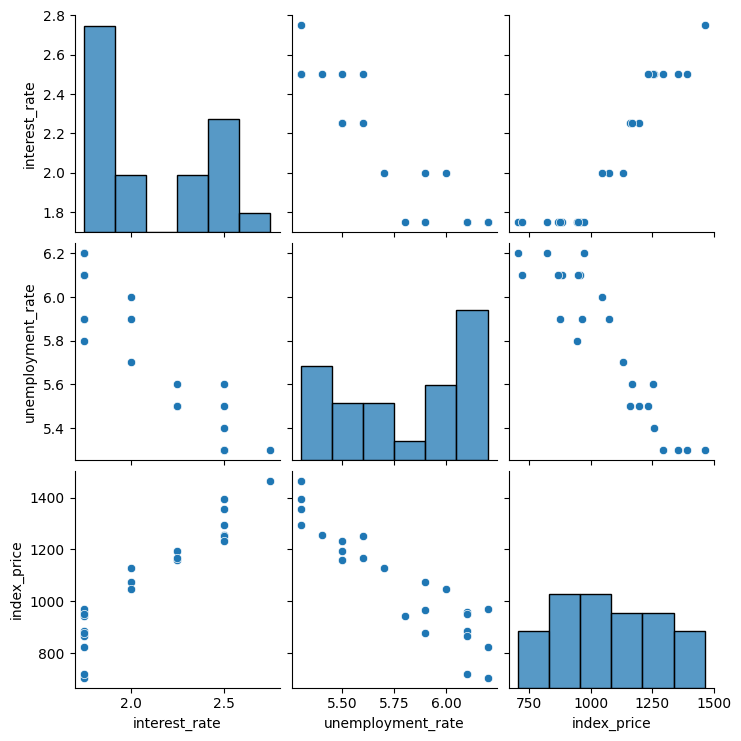

In [5]:
sns.pairplot(df)

In [6]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [7]:
x=df.iloc[:,0:-1]
y=df.iloc[:,1]

In [8]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [9]:
y.head()

0    5.3
1    5.3
2    5.3
3    5.3
4    5.4
Name: unemployment_rate, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

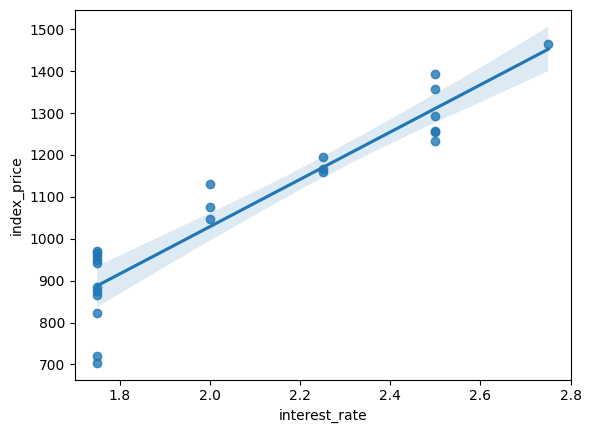

In [13]:
sns.regplot(x="interest_rate",y="index_price",data=df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

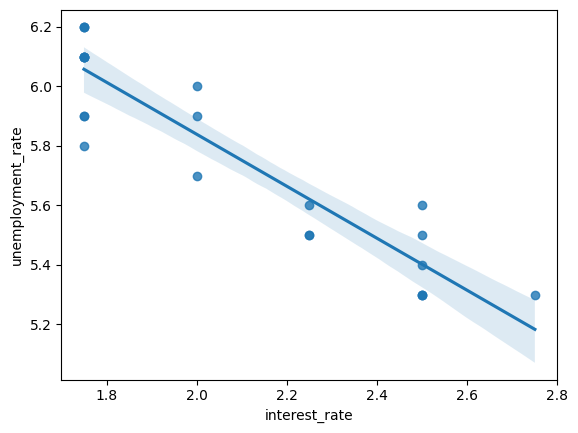

In [14]:
sns.regplot(x="interest_rate",y="unemployment_rate",data=df)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [16]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [18]:
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
from sklearn.model_selection import cross_val_score

In [22]:
validation_csore = cross_val_score(lr,x_train,y_train,cv=3,scoring='neg_mean_squared_error')

validation_csore

array([-0.00000000e+00, -7.88860905e-31, -7.88860905e-31])

In [23]:
np.mean(validation_csore)

-5.259072701473412e-31

In [24]:
y_pred = lr.predict(x_test)
y_pred 

array([5.8898288 , 5.28521471, 6.19213584, 5.58752175, 5.28521471,
       5.99059781, 6.09136682, 5.28521471, 5.38598372, 6.19213584,
       6.09136682, 5.8898288 , 6.09136682, 5.48675274, 5.68829077,
       5.78905978, 6.09136682, 5.48675274])

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

print("Mean Squared Error :",mse)
print("Mean absolute Error :",mae)
print("root Mean Squared Error :",rmse)

Mean Squared Error : 0.00012960425731285767
Mean absolute Error : 0.01111111111111112
root Mean Squared Error : 0.011384386558478137
